# EDA

Check ouliers based on the number of beds/baths. Write comments to this code. Do all steps before modeling.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [172]:
df = pd.read_csv('../data/processed/clean_kelowna_housing_data.csv')

In [173]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score,Transit Score
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675,54,96,56
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367,43,49,-1
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367,43,49,-1
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367,43,49,-1
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367,43,49,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816,75,97,48
1260,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932,0,28,-1
1261,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449,14,24,-1
1262,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058,15,52,37


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1264 non-null   object 
 1   price            1264 non-null   int64  
 2   address          1264 non-null   object 
 3   Type             1264 non-null   object 
 4   nbeds            1264 non-null   int64  
 5   nbath            1264 non-null   int64  
 6   laundry          1264 non-null   object 
 7   heating          1264 non-null   object 
 8   parking          1264 non-null   object 
 9   air_conditioner  1264 non-null   object 
 10  furnished        1264 non-null   object 
 11  animal_friendly  1264 non-null   object 
 12  Area             1264 non-null   int64  
 13  lat              1264 non-null   float64
 14  lng              1264 non-null   float64
 15  Walk Score       1264 non-null   int64  
 16  Bike Score       1264 non-null   int64  
 17  Transit Score 

In [175]:
df.describe(include = [object]).T

,count,unique,top,freq
name,1264,267,1 bed 1 bath house,159
address,1264,491,"kelowna, bc",305
Type,1264,4,House,619
laundry,1264,4,in-unit laundry,711
heating,1264,6,central heating,430
parking,1264,4,parking available,383
air_conditioner,1264,3,central ac,513
furnished,1264,3,unfurnished,811
animal_friendly,1264,4,No pets,951


In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1264.0,1941.492089,1250.843913,450.00000,1000.000000,1800.00000,2500.00000,12785.00000
nbeds,1264.0,1.970728,1.063285,1.00000,1.000000,2.00000,3.00000,7.00000
nbath,1264.0,1.454114,0.713704,0.00000,1.000000,1.00000,2.00000,6.00000
Area,1264.0,1077.856013,643.381526,80.00000,910.000000,1200.00000,1200.00000,7000.00000
lat,1264.0,49.888013,0.163587,49.29241,49.860003,49.88698,49.89791,50.38468
lng,1264.0,-119.472289,0.136443,-120.14867,-119.496910,-119.49661,-119.41109,-118.61706
Walk Score,1264.0,41.554589,27.255749,0.00000,13.000000,46.00000,64.00000,98.00000
Bike Score,1264.0,63.162975,33.526799,-1.00000,28.000000,73.50000,98.00000,99.00000
Transit Score,1264.0,33.027690,25.112952,-1.00000,-1.000000,42.00000,59.00000,60.00000


Transit Score have a lot of missing values, Therefore, I decided to completely delete this column.

In [177]:
df = df.drop(columns={'Transit Score'})

## Distribution of price

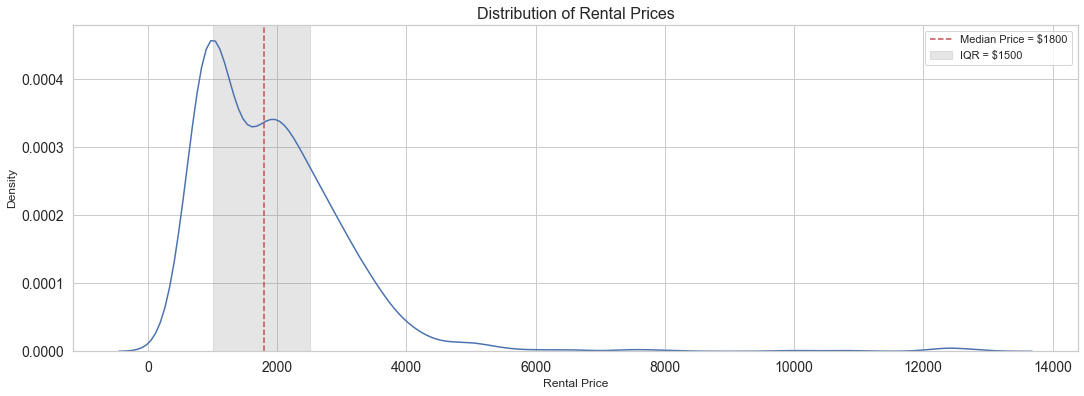

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Plot the kernel density estimate of the rental price distribution
ax = sns.kdeplot(data=df, x="price")

# Set axis labels and title
ax.set(xlabel='Rental Price', ylabel='Density', title='Distribution of Rental Prices')

# Increase font size of axis labels and title
ax.tick_params(axis='both', labelsize=14)
ax.set_title(ax.get_title(), fontsize=16)

# Adjust axis limits

# Add vertical line to show median rental price
median_price = df["price"].median()
ax.axvline(median_price, color='r', linestyle='--', label=f"Median Price = ${median_price:.0f}")

# Add shaded region to show interquartile range
q1, q3 = df["price"].quantile([0.25, 0.75])
iqr = q3 - q1
ax.axvspan(q1, q3, alpha=0.2, color='gray', label=f"IQR = ${iqr:.0f}")

# Add legend
ax.legend()
plt.show()


The distribution is right skewed and bimodal. Most of ml models work fine with it. But for lm i will transform the price column.

## What is the number of properties in each city?

In [179]:
df['city'] = df['address'].str.split(',').str[0]

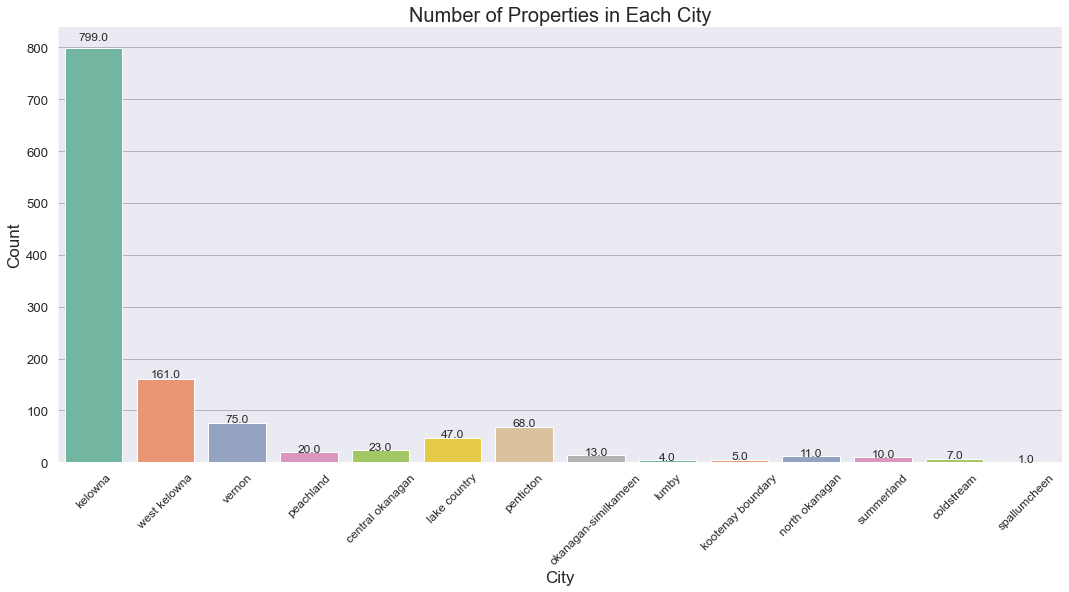

In [214]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df, x='city', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Count', fontsize=17)
ax.set_title('Number of Properties in Each City', fontsize=20)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(rotation=45, fontsize=12)

# add count labels to the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontsize=12)

# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# adjust bottom and left spines
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# set grid lines
ax.grid(color='grey', linestyle='-', axis='y', alpha=0.5)

# display the plot
plt.show()

I will delete cities with less than 10 properties, that significantly differs from the price mean. Because, their location could affect the predcition.

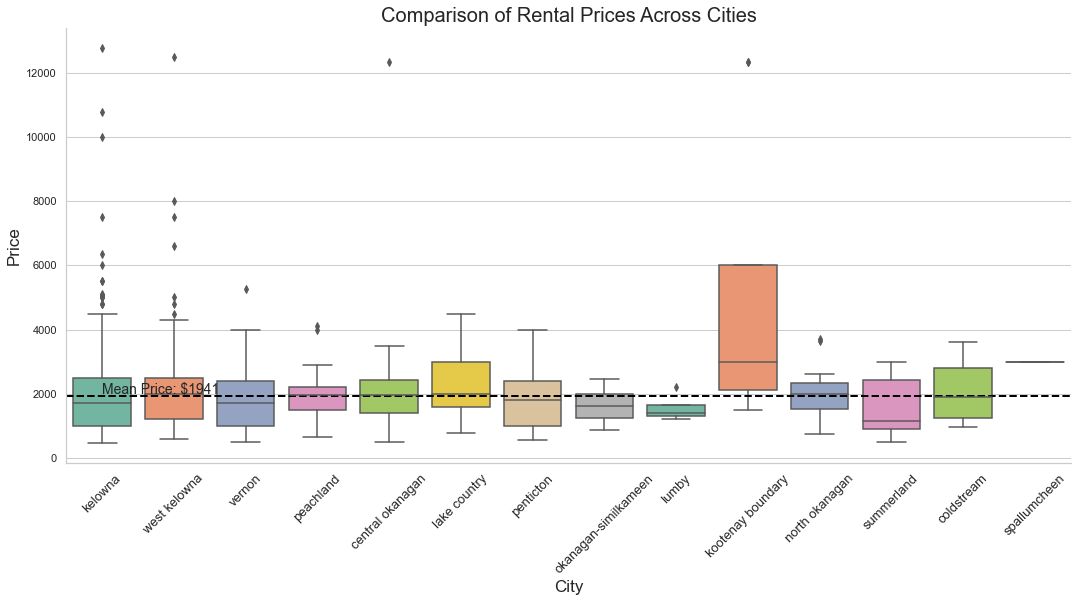

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df, x='city', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
sns.despine()
plt.show()

## Which type of rental properties (e.g. apartment, townhouse, etc.) are most common in the dataset?


In [183]:
df2 = df[['price', 'Type', 'nbeds', 'nbath', 'Area', 'lat', 'lng', 'Walk Score', 'Bike Score']]

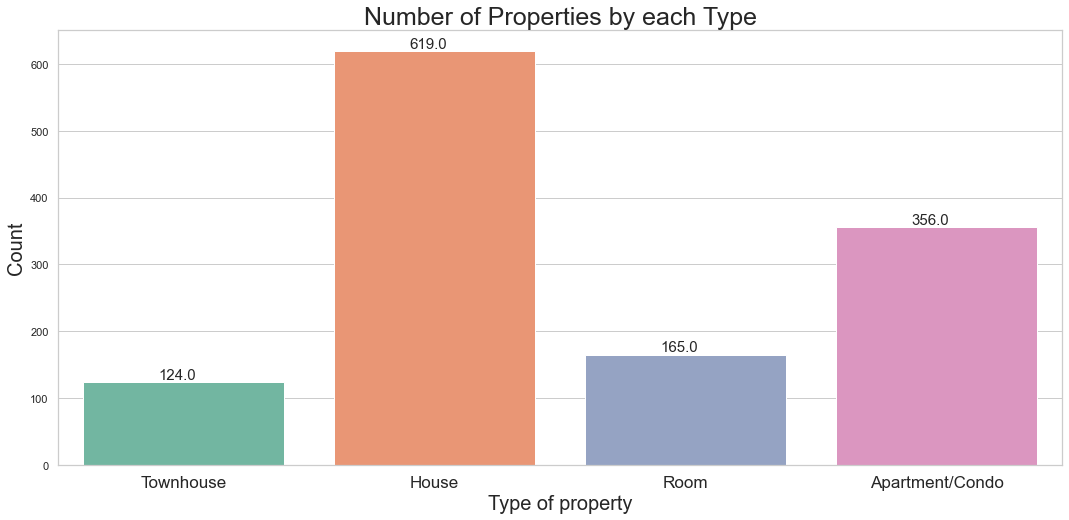

In [184]:
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=df2, x='Type', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of property', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Number of Properties by each Type', fontsize=25)

# rotate the x-axis labels to improve readability and make them larger
plt.xticks(fontsize=17)

# add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 5), fontsize=15)

# display the plot
plt.show()

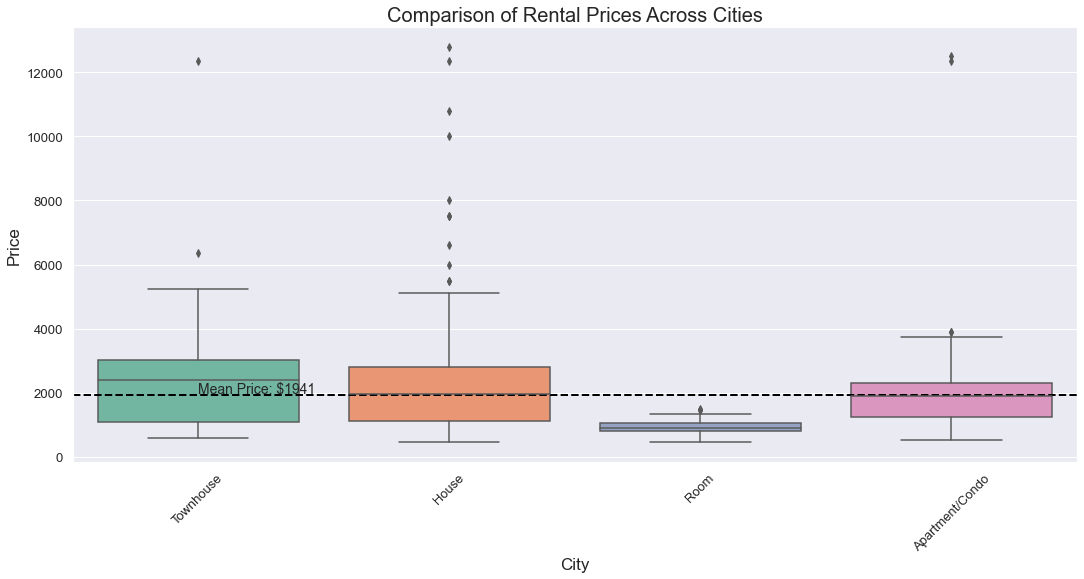

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a box plot of the city and price columns
plt.figure(figsize=(18, 8))
ax = sns.boxplot(data=df2, x='Type', y='price', palette='Set2')

# set the labels and title
ax.set_xlabel('City', fontsize=17)
ax.set_ylabel('Price', fontsize=17)
ax.set_title('Comparison of Rental Prices Across Cities', fontsize=20)

# add the average price as a horizontal line
mean_price = df2['price'].mean()
ax.axhline(y=mean_price, color='black', linestyle='--', linewidth=2)
ax.text(0, mean_price + 50, f'Mean Price: ${mean_price:.0f}', fontsize=14)

# rotate the x-axis labels to improve readability
plt.xticks(rotation=45, fontsize=13)

# display the plot
plt.show()

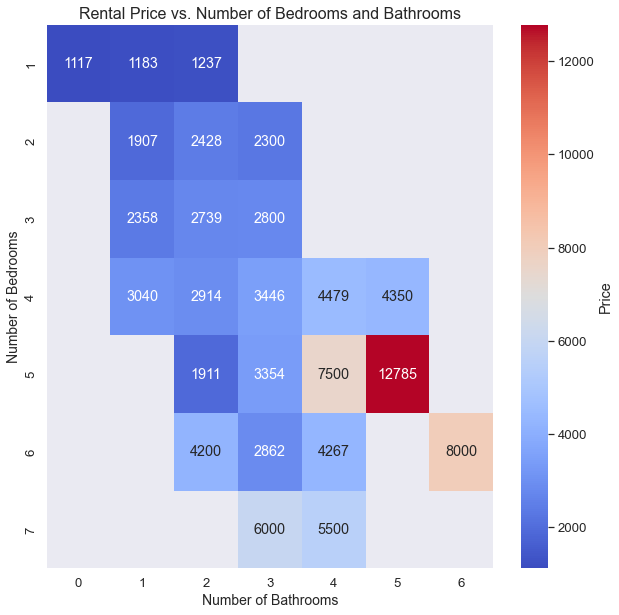

In [216]:
import seaborn as sns

# create a heat map of rental prices based on number of bedrooms and bathrooms
fig, ax = plt.subplots(figsize=(10, 10))
pivot_table = df2.pivot_table(index='nbeds', columns='nbath', values='price', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Price'})
ax.set_xlabel('Number of Bathrooms', fontsize=14)
ax.set_ylabel('Number of Bedrooms', fontsize=14)
ax.set_title('Rental Price vs. Number of Bedrooms and Bathrooms', fontsize=16)
plt.show()


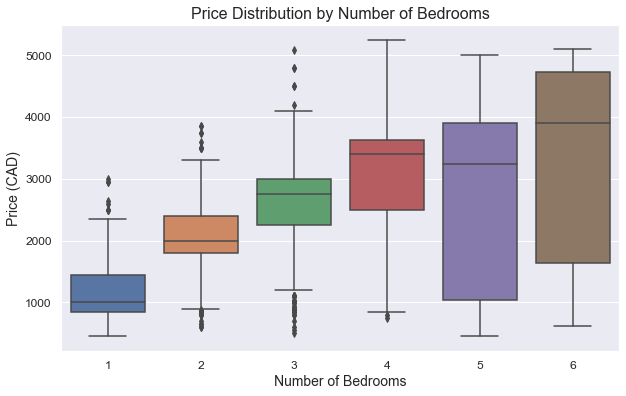

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)

# customize the tick labels and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

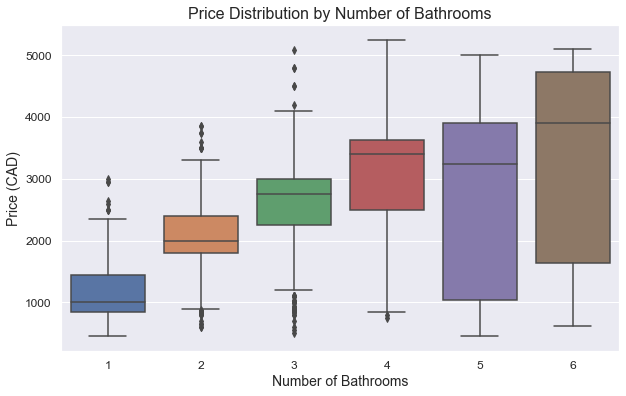

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nbeds', y='price')

# set the labels and title
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.title('Price Distribution by Number of Bathrooms', fontsize=16)

# customize the tick labels and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.show()

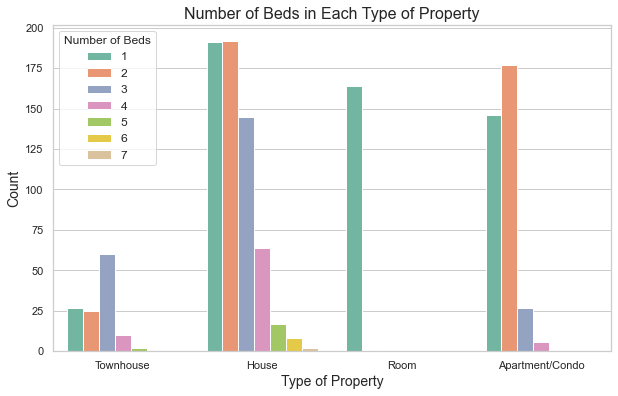

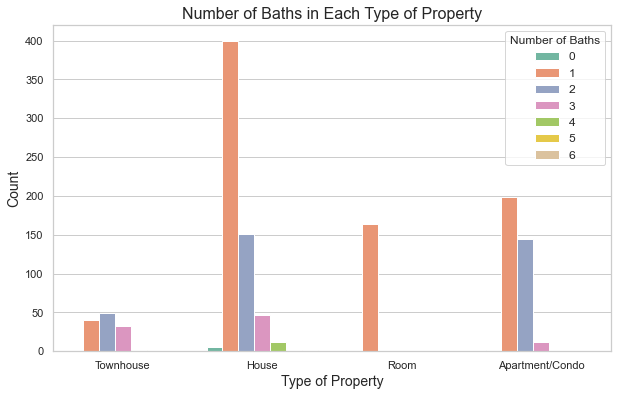

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a count plot of number of beds in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbeds', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Beds in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Beds', fontsize=12)

# display the plot
plt.show()

# create a count plot of number of baths in each type of property
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Type', hue='nbath', palette='Set2')

# set the labels and title
ax.set_xlabel('Type of Property', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Baths in Each Type of Property', fontsize=16)

# add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Number of Baths', fontsize=12)

# display the plot
plt.show()

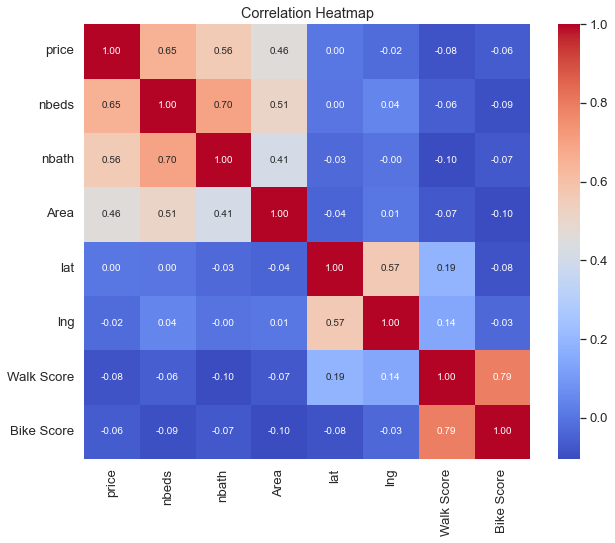

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

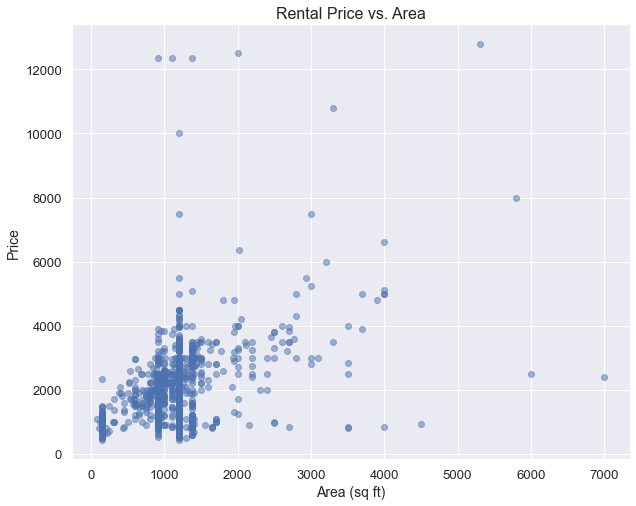

In [192]:
import matplotlib.pyplot as plt

# create a scatter plot of rental price vs. area
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df2['Area'], df2['price'], alpha=0.5)
ax.set_xlabel('Area (sq ft)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Rental Price vs. Area', fontsize=16)
plt.show()

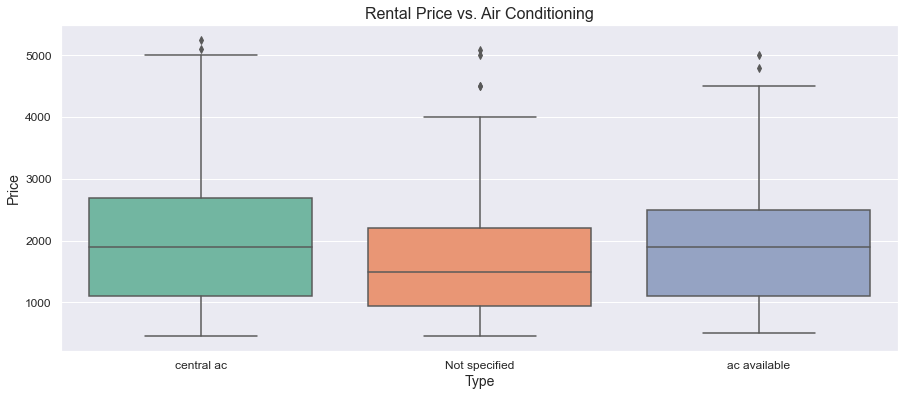

In [220]:
import seaborn as sns

# create a box plot of rental price vs. air conditioning
plt.figure(figsize=(15, 6))
sns.boxplot(x="air_conditioner", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Air Conditioning', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

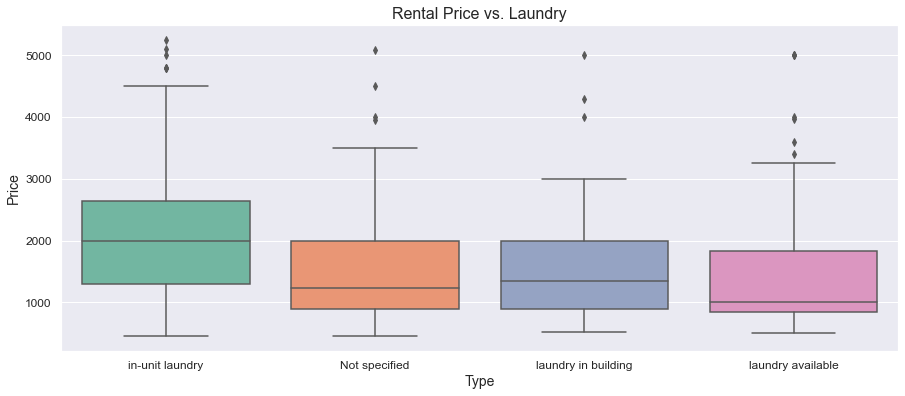

In [221]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x="laundry", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Laundry', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

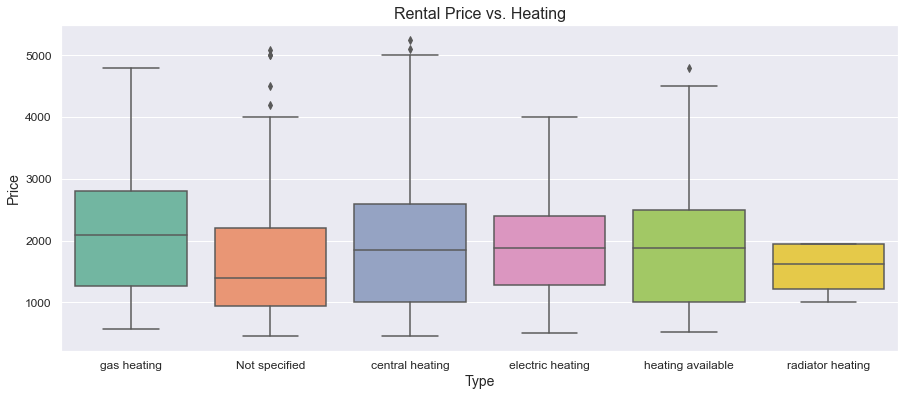

In [222]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="heating", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Heating', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [196]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score,city
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675,54,96,kelowna
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367,43,49,west kelowna
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367,43,49,west kelowna
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367,43,49,west kelowna
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367,43,49,west kelowna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816,75,97,kelowna
1260,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932,0,28,penticton
1261,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449,14,24,west kelowna
1262,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058,15,52,kelowna


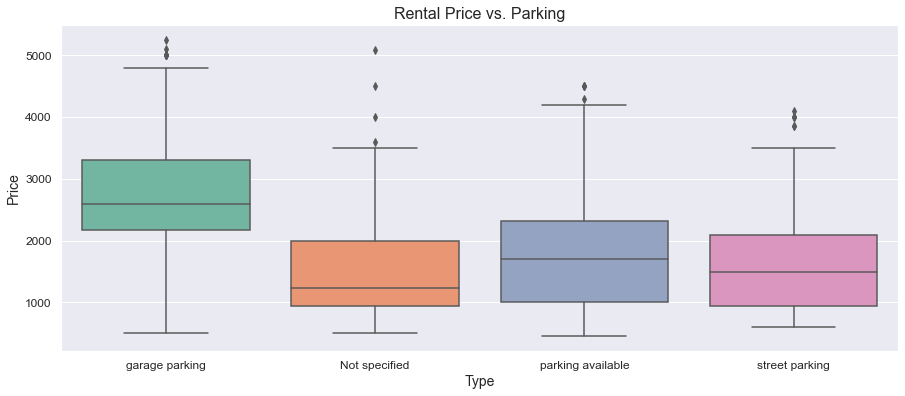

In [223]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="parking", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Parking', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

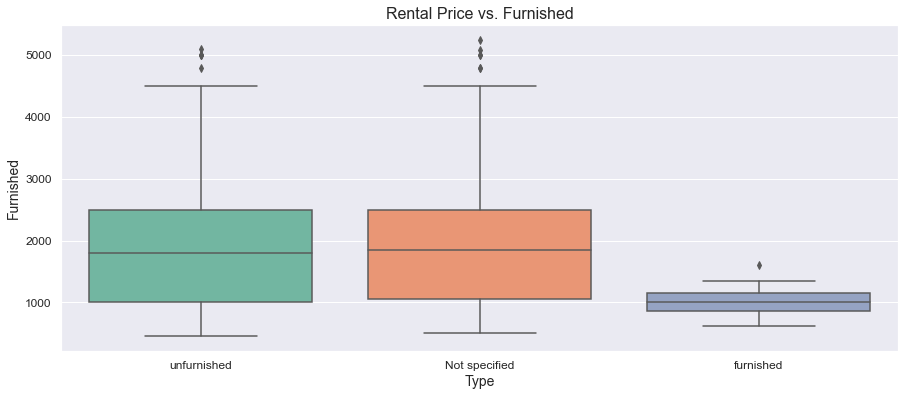

In [224]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="furnished", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Furnished', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

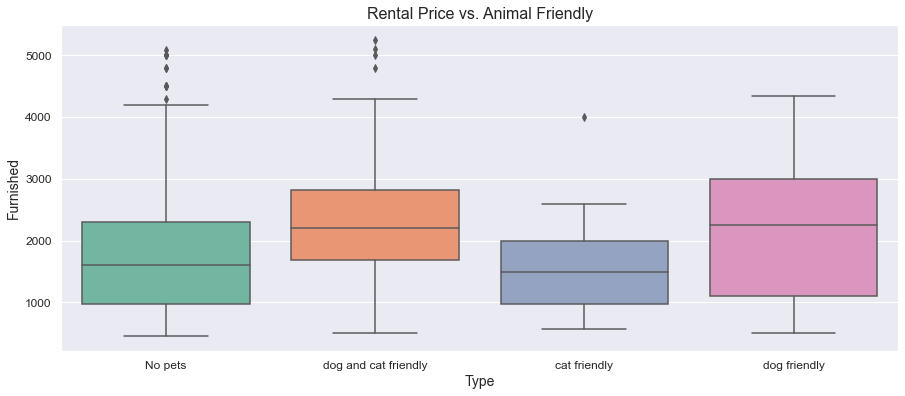

In [225]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="animal_friendly", y="price", data=df, palette="Set2")
plt.title('Rental Price vs. Animal Friendly', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Furnished', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [200]:
# Calculate average rental price by location
avg_price_by_location = df.groupby(['lat', 'lng']).agg({'price': 'mean'}).reset_index()

# Create map centered on the mean latitude and longitude
m = folium.Map(location=[avg_price_by_location['lat'].mean(), avg_price_by_location['lng'].mean()], zoom_start=12)

# Add marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for i, row in avg_price_by_location.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"${row['price']:.2f}",
        icon=folium.Icon(color='blue', icon='home'),
    ).add_to(marker_cluster)

# Display the map
m

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [226]:
grouped = df.groupby('Type')
# Group the df by 'Type' column, so i can check for IQR in all types

q1 = grouped["price"].transform(lambda x: x.quantile(0.25))
q3 = grouped["price"].transform(lambda x: x.quantile(0.75))

iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
# Calculate the upper and lower bounds using the interquartile range

outliers = df[df["price"].gt(upper_bound) | df["price"].lt(lower_bound)]

outliers
# print all outliers

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score,city
304,1 bed 1 bath,450,"kelowna, bc",Room,1,1,Not specified,Not specified,parking available,Not specified,unfurnished,No pets,150,49.88698,-119.49661,64,98,kelowna
385,private room for rent,1350,"kelowna, bc",Room,1,1,in-unit laundry,central heating,Not specified,central ac,furnished,No pets,150,49.88698,-119.49661,64,98,kelowna
1231,private room for rent,1350,"west kelowna, bc, v1z 1y4",Room,1,1,laundry available,Not specified,parking available,Not specified,unfurnished,No pets,150,49.85773,-119.54354,0,15,west kelowna


In [203]:
df = df.drop(outliers.index)

In [204]:
df

,name,price,address,Type,nbeds,nbath,laundry,heating,parking,air_conditioner,furnished,animal_friendly,Area,lat,lng,Walk Score,Bike Score,city
0,3 beds 3 baths townhouse,3300,"kelowna, bc, v1y 5t5",Townhouse,3,3,in-unit laundry,gas heating,garage parking,central ac,unfurnished,No pets,1371,49.87816,-119.47675,54,96,kelowna
1,2 beds 1 bath house,2000,"west kelowna, bc, v4t",House,2,1,in-unit laundry,Not specified,Not specified,Not specified,Not specified,dog and cat friendly,914,49.83173,-119.62367,43,49,west kelowna
2,private room for rent,570,"west kelowna, bc, v4t",Room,1,1,in-unit laundry,gas heating,Not specified,ac available,unfurnished,cat friendly,150,49.83173,-119.62367,43,49,west kelowna
3,3 beds 2 baths townhouse,2900,"west kelowna, bc, v4t",Townhouse,3,2,in-unit laundry,central heating,garage parking,central ac,Not specified,dog and cat friendly,1371,49.83173,-119.62367,43,49,west kelowna
4,4 beds 2 5 baths house,3800,"west kelowna, bc, v4t",House,4,2,in-unit laundry,Not specified,garage parking,Not specified,unfurnished,No pets,2500,49.83173,-119.62367,43,49,west kelowna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1 bed 1 bath house,950,"kelowna, bc, v1y 2r7",House,1,1,in-unit laundry,central heating,street parking,central ac,Not specified,No pets,1200,49.86395,-119.48816,75,97,kelowna
1260,private room for rent,1100,"penticton, bc, v2a 8t7",Room,1,1,Not specified,Not specified,Not specified,Not specified,furnished,dog and cat friendly,150,49.53912,-119.56932,0,28,penticton
1261,shared senior living,1100,"west kelowna, bc, v4t 1v3",House,3,2,in-unit laundry,gas heating,street parking,central ac,furnished,No pets,1400,49.84618,-119.60449,14,24,west kelowna
1262,2 beds 1 bath house,2800,"kelowna, bc, v1v 2n2",House,2,1,in-unit laundry,gas heating,street parking,Not specified,unfurnished,No pets,1200,49.90500,-119.46058,15,52,kelowna


In [205]:
data = pd.get_dummies(df.drop(columns = {'name', 'address', 'city'}))
data

,price,nbeds,nbath,Area,lat,lng,Walk Score,Bike Score,Type_Apartment/Condo,Type_House,...,air_conditioner_Not specified,air_conditioner_ac available,air_conditioner_central ac,furnished_Not specified,furnished_furnished,furnished_unfurnished,animal_friendly_No pets,animal_friendly_cat friendly,animal_friendly_dog and cat friendly,animal_friendly_dog friendly
0,3300,3,3,1371,49.87816,-119.47675,54,96,0,0,...,0,0,1,0,0,1,1,0,0,0
1,2000,2,1,914,49.83173,-119.62367,43,49,0,1,...,1,0,0,1,0,0,0,0,1,0
2,570,1,1,150,49.83173,-119.62367,43,49,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2900,3,2,1371,49.83173,-119.62367,43,49,0,0,...,0,0,1,1,0,0,0,0,1,0
4,3800,4,2,2500,49.83173,-119.62367,43,49,0,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,950,1,1,1200,49.86395,-119.48816,75,97,0,1,...,0,0,1,1,0,0,1,0,0,0
1260,1100,1,1,150,49.53912,-119.56932,0,28,0,0,...,1,0,0,0,1,0,0,0,1,0
1261,1100,3,2,1400,49.84618,-119.60449,14,24,0,1,...,0,0,1,0,1,0,1,0,0,0
1262,2800,2,1,1200,49.90500,-119.46058,15,52,0,1,...,1,0,0,0,0,1,1,0,0,0


In [206]:
X = data.iloc[:, 1:]  # all rows, no label
y = data.loc[:, 'price']  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean squared error: 325098.37
R2 score: 0.62


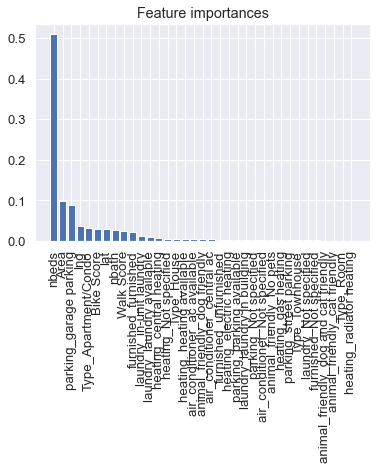

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Define the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the parameter grid for pruning
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_reg = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the model on the training set using the best hyperparameters
best_rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_reg.predict(X_test)

# Evaluate the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score: %.2f' % r2_score(y_test, y_pred))

# Plot the feature importances
importances = best_rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

Mean squared error: 316694.0415
R^2 score: 0.6337
Top 10 most important features: Index(['nbeds', 'Area', 'parking_garage parking', 'lng', 'Bike Score', 'lat',
       'Walk Score', 'nbath', 'Type_Apartment/Condo', 'furnished_furnished'],
      dtype='object')


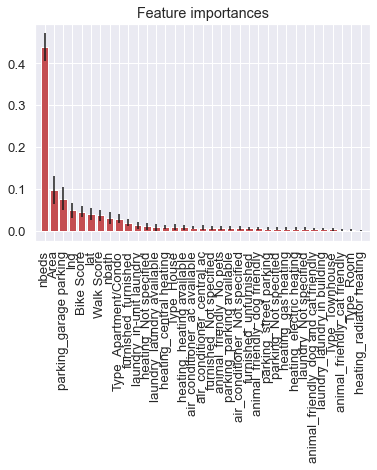

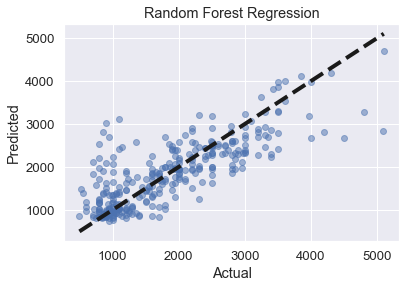

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# define the number of trees in the random forest
n_trees = 100

# instantiate the random forest regressor with pruning
rf = RandomForestRegressor(n_estimators=n_trees, ccp_alpha=0.01)

# fit the model to the training data
rf.fit(X_train, y_train)

# predict the target values for the test data
y_pred = rf.predict(X_test)

# calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: {:.4f}'.format(mse))
print('R^2 score: {:.4f}'.format(r2))

# plot the feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# select the top 10 most important features
top_features = indices[:10]
print('Top 10 most important features:', X_train.columns[top_features])

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# plot the predicted vs. actual target values
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.show()


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 34
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1856.561629
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

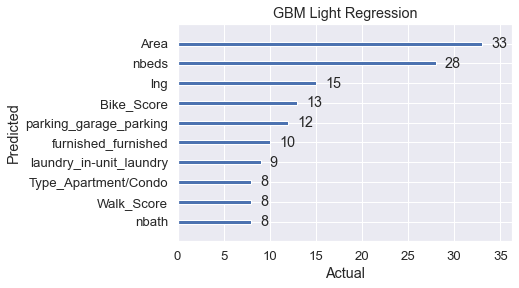

In [209]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, _scorer
import matplotlib.pyplot as plt

# define the hyperparameters for the GBM Light model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 3,
    'num_leaves': 31,
    'learning_rate': 0.15,
    'feature_fraction': 0.9
}

# create the training and validation datasets for GBM Light
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test)

# train the GBM Light model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=[lgb_train, lgb_val],
                early_stopping_rounds=50,
                verbose_eval=50)

# predict the target values for the test data
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: {:.4f}'.format(mse))
print('R^2 score: {:.4f}'.format(r2))

# plot the feature importances
lgb.plot_importance(gbm, max_num_features=10)

# plot the predicted vs. actual target values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GBM Light Regression')
plt.show()

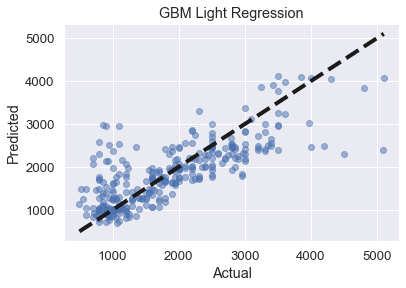

In [210]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GBM Light Regression')
plt.show()

In [211]:
mean_squared_error(y_test, y_pred)

337719.8440312241

In [212]:
y_test

787     2650
1168    1800
678     2000
443      900
742     2300
        ... 
226     1200
626     1200
276      800
424     1100
937     1200
Name: price, Length: 311, dtype: int64

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 34
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1856.561629
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

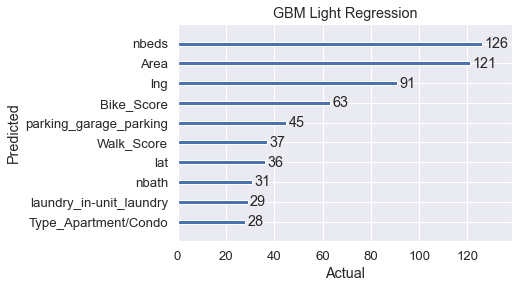

AttributeError: 'Booster' object has no attribute 'evals_result_'

In [213]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# define the hyperparameters for the GBM Light model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 3,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'min_child_samples': 10
}

# create the training and validation datasets for GBM Light
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test)

# train the GBM Light model
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=[lgb_train, lgb_val],
                early_stopping_rounds=50,
                verbose_eval=50)

# predict the target values for the test data
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the results
print('Mean squared error: {:.4f}'.format(mse))
print('R^2 score: {:.4f}'.format(r2))

# plot the feature importances
lgb.plot_importance(gbm, max_num_features=10)

# plot the predicted vs. actual target values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GBM Light Regression')
plt.show()

# plot the training and validation MSE scores over boosting rounds
train_mse = gbm.evals_result_['training']['mse']
val_mse = gbm.evals_result_['valid_1']['mse']
x_axis = np.arange(0, len(train_mse))
plt.plot(x_axis, train_mse, label='Training MSE')
plt.plot(x_axis, val_mse, label='Validation MSE')
plt.legend()
plt.xlabel('Boosting round')
plt.ylabel('MSE')
plt.title('Training and Validation MSE over Boosting Rounds')
plt.show()
